In [2]:
import pandas as pd

df=pd.read_csv('IBM.csv')

## 1. 결측치 , 이상치 검토


#### 1-1 결측치 검토

In [11]:
df.isna().any(axis=1).sum() # 결측치가 없어보임

0

#### 1-2 이상치 검토

In [12]:
# pandas 의 describe를 활용하여 기초통계량을 확인
df.describe()



,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [64]:
df.info() # 데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

히스토그램 그려보기

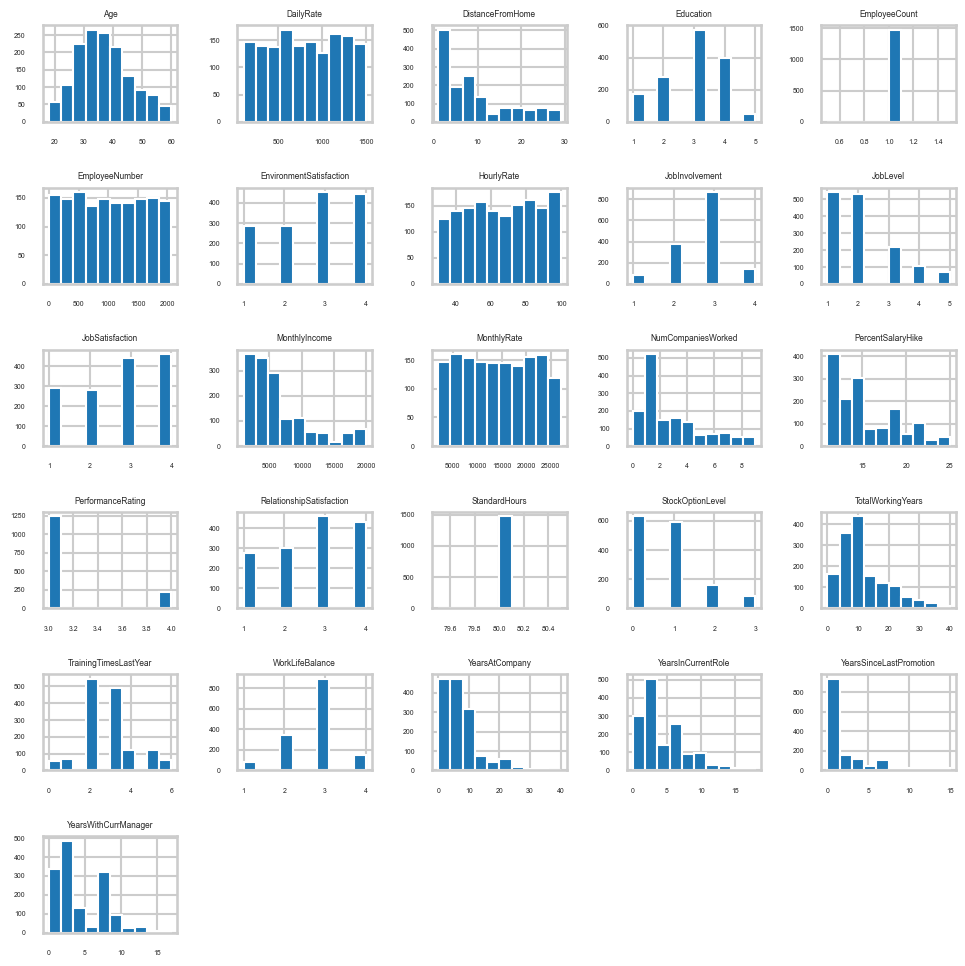

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 숫자로만 보면 잘 안와닿으니 히스토그램을 통해서 시각화 
plt.rcParams['axes.labelsize']=3
plt.rcParams['axes.titlesize']=6
plt.rcParams['xtick.labelsize']=5
plt.rcParams['ytick.labelsize']=5
df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()





히스토그램으로는 값이 명확하게 이상치인지 파악하기가 힘들었음, 

BoxPlot 그려보기

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_26448\2871343539.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(17,1))


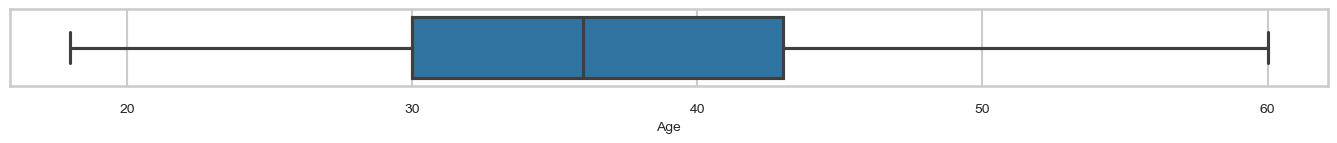

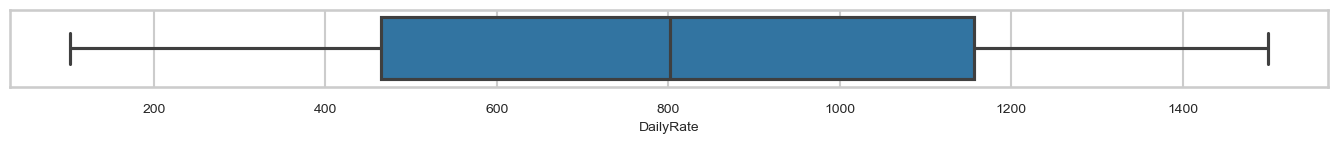

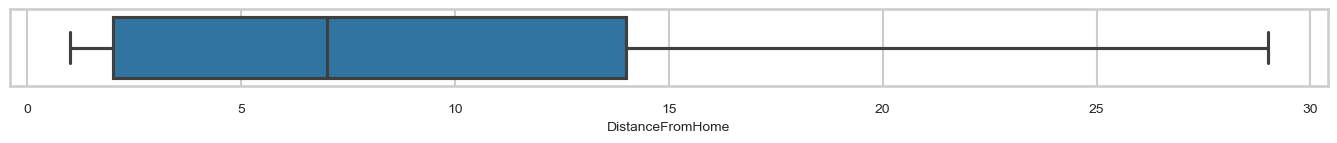

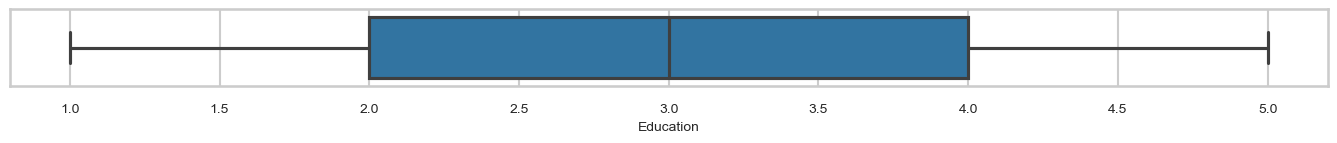

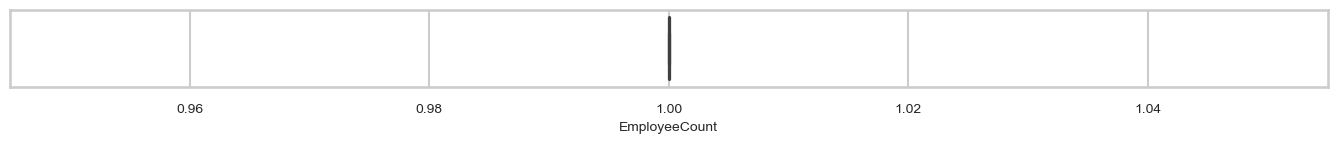

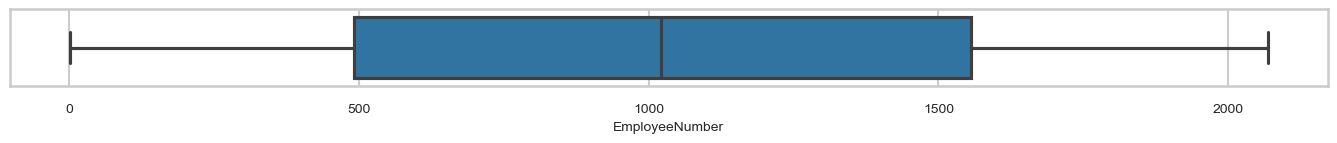

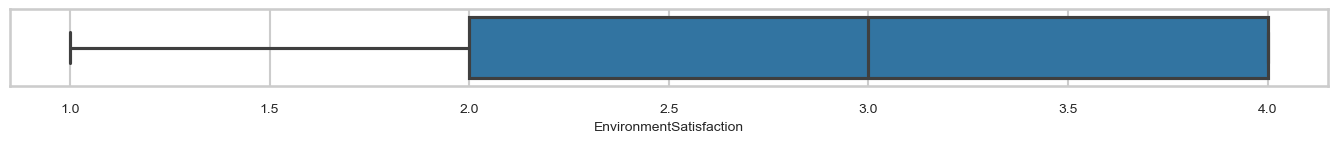

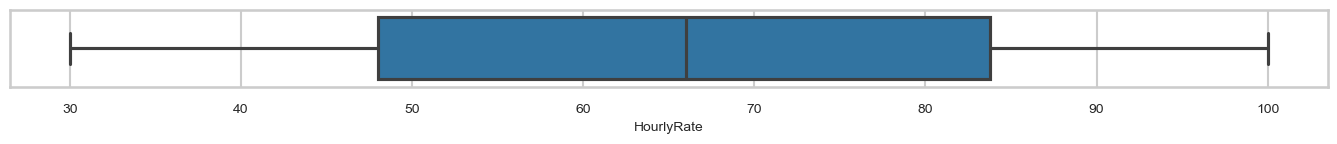

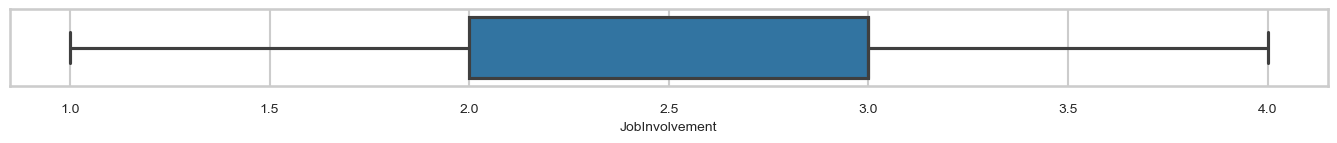

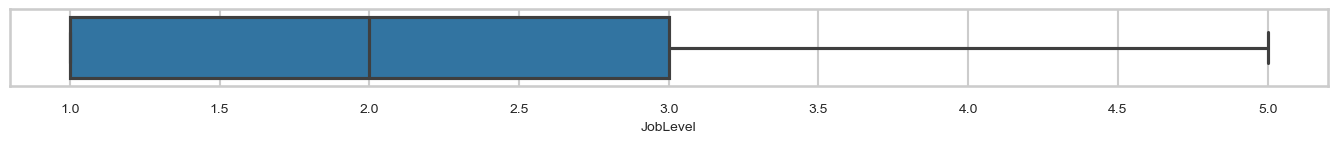

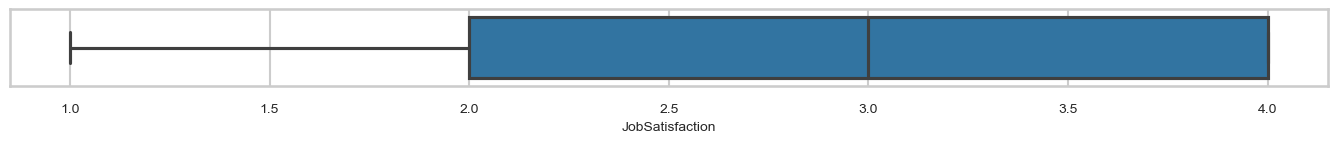

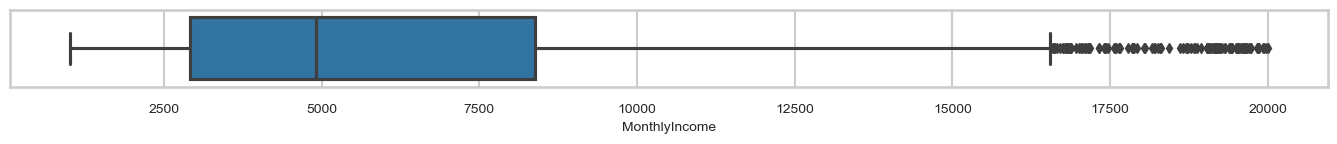

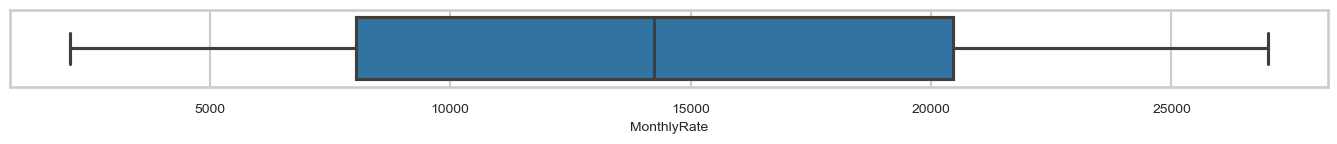

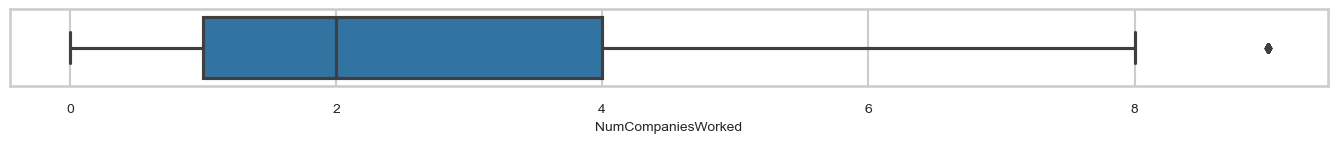

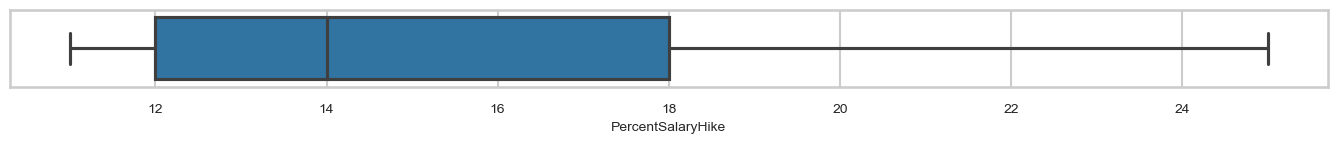

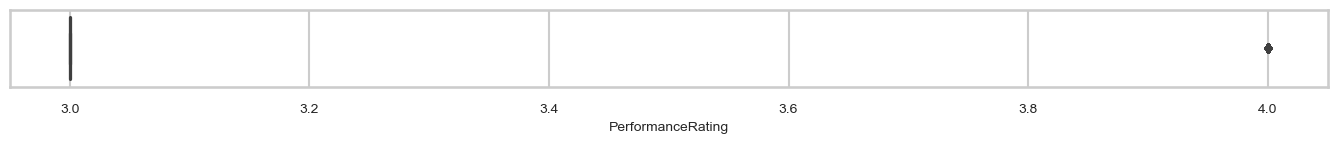

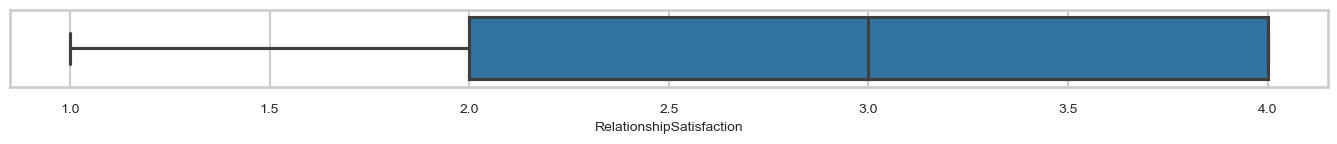

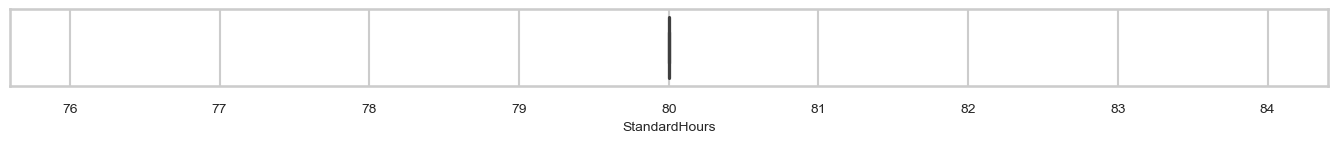

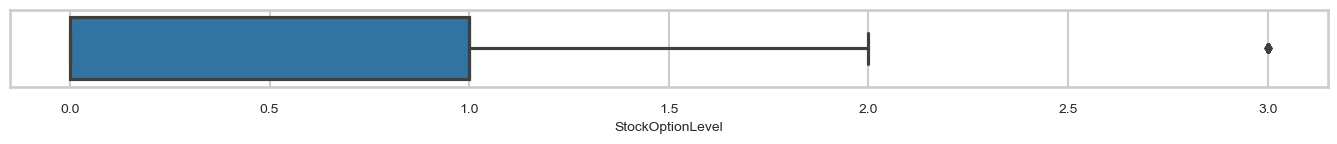

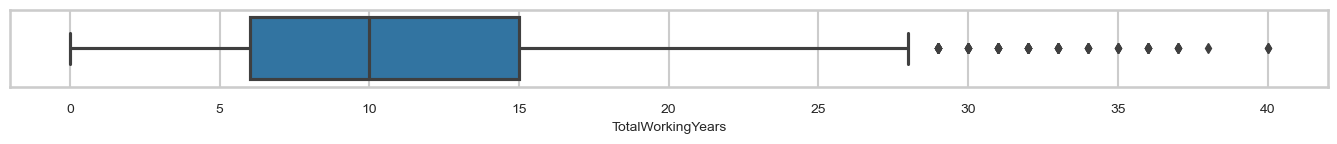

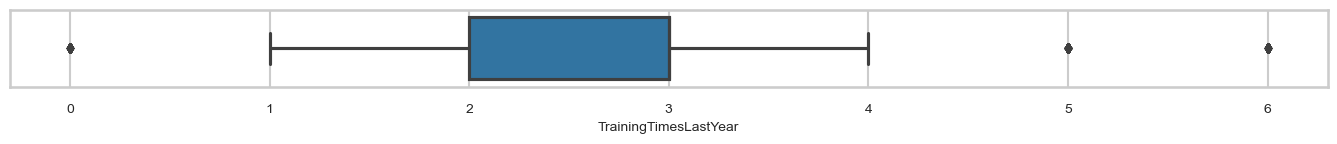

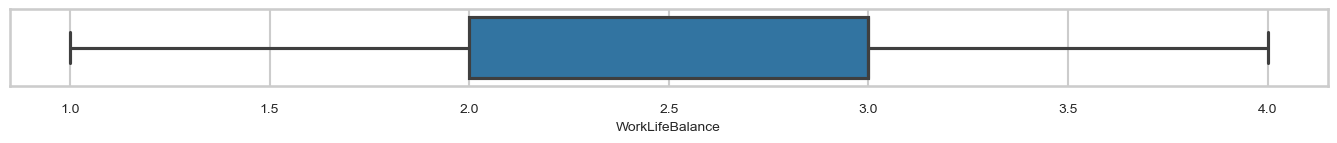

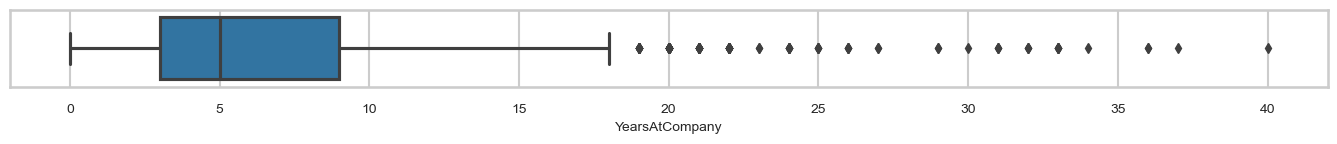

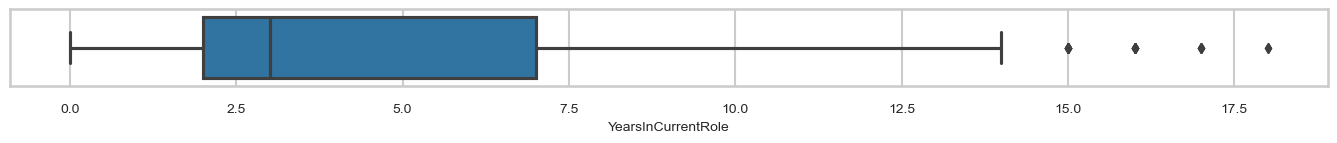

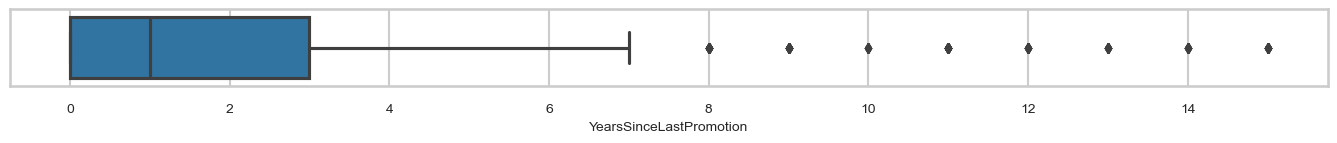

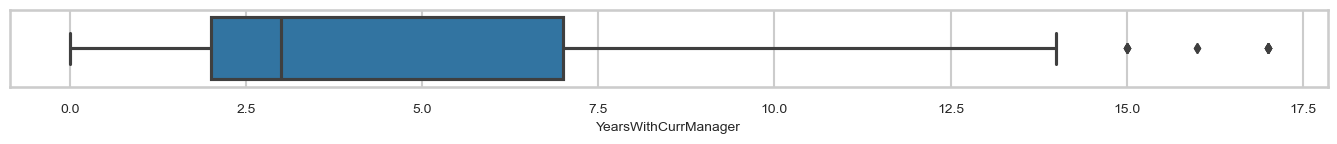

In [40]:
df1=df.select_dtypes(exclude=['object']) ## Boxkplot을 찍을 수 있는것들에 대해서만 
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize']=10
plt.rcParams['axes.titlesize']=10
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10

for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)


Boxplot을 찍어본 결과, 꽤 여러개의 특성에서 이상치가 존재함을 확인 가능. (수직선 밖의 점들 ), 특히 Montly Income은 이상치가 매우 많은데, 빈부격차(?)가 심함을 확인 할 수 있음. 


## 2.유의미한 시각화

#### 2-1 Categorical Variable에 대하여 시각화

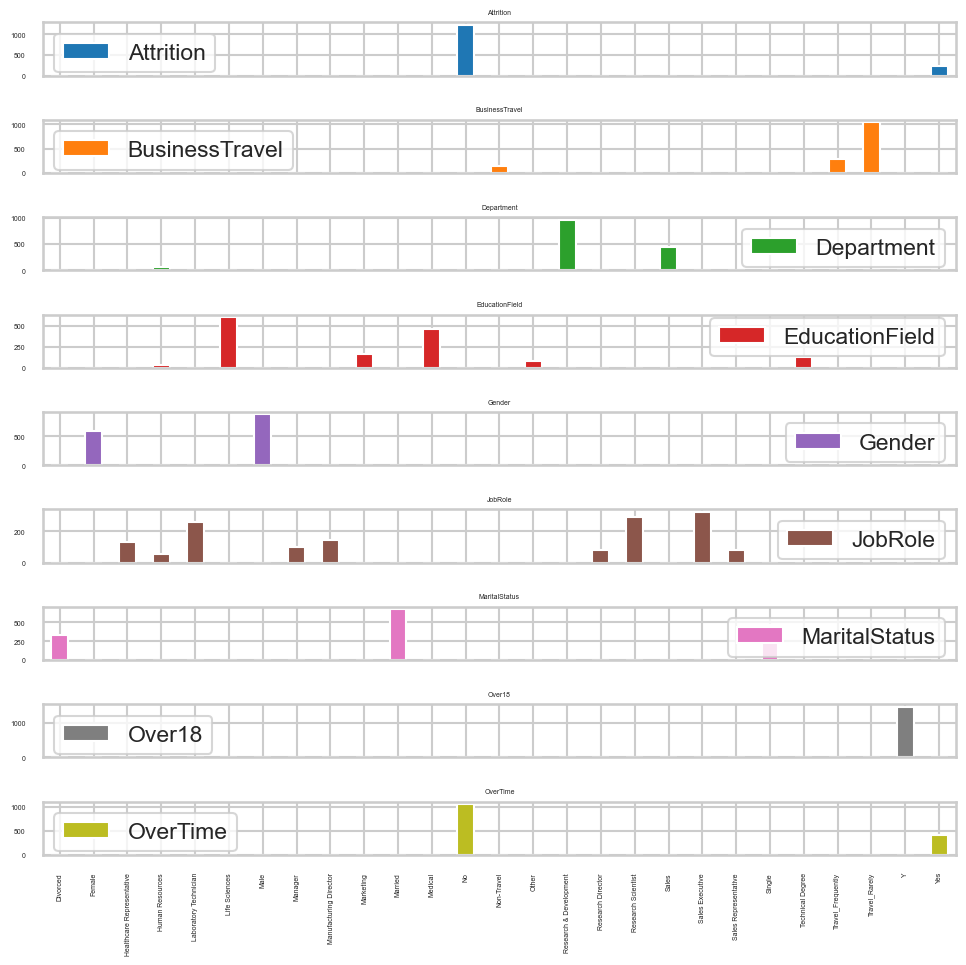

In [48]:
# Category 변수에 대해서는 value_counts를 통해서 각각의 값이 몇개씩 있는지 확인
df.select_dtypes(include=['object']).apply(pd.Series.value_counts)
# plot
plt.rcParams['axes.labelsize']=5
plt.rcParams['axes.titlesize']=5
plt.rcParams['xtick.labelsize']=5
plt.rcParams['ytick.labelsize']=5
df.select_dtypes(include=['object']).apply(pd.Series.value_counts).plot(kind='bar', subplots=True, figsize=(10,10))
#indicator size smaller


plt.tight_layout()
plt.show()
# label size smaller




평범한 형태이지만, 몇가지 변수들(Overtime, Attrition )에 대하여, 한가지로 쏠린 형태의 분포를 확인 할 수 있음. 

#### 2-2 Continuous한 변수들에 대하여 Correlation 확인해보기


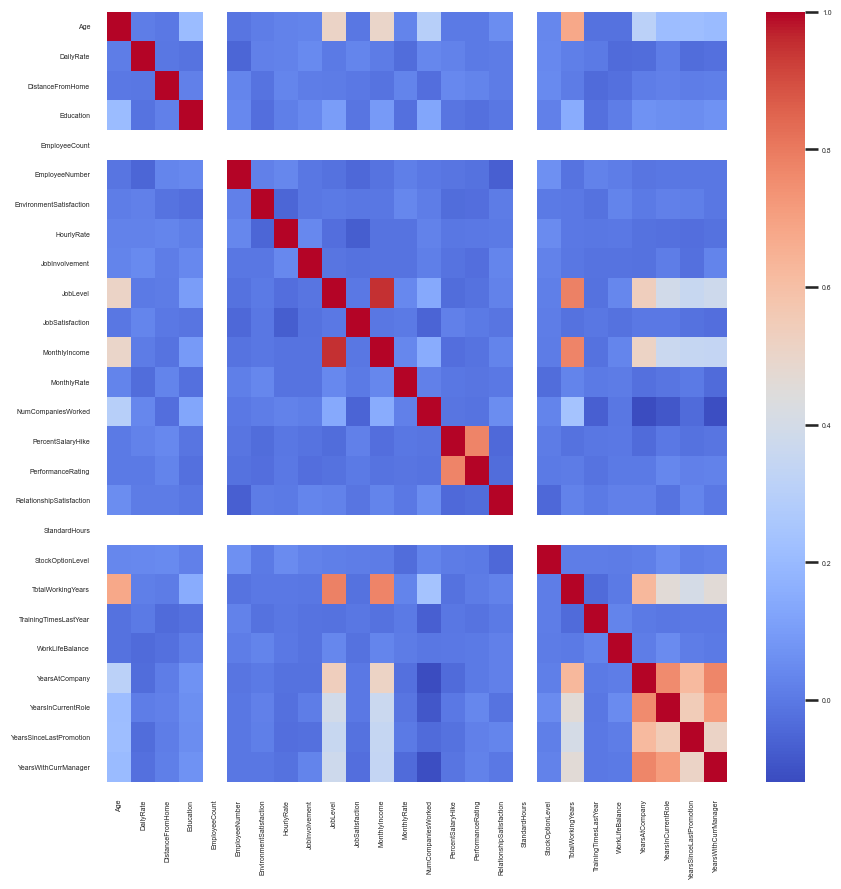

In [50]:
# Correlation matrix based on numerical variables
corr = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

변수들간의  Correltion이 많은 건 아니지만, Yearsatcompany, currentrole, lastpromotion, currmanager등 연관이 있는 항목들에 대하여, Correlaiton이 높은 것을 확인 할 수 있음. 

#### 2-3 Correlation의 정도에 따라  Scatter plot 확인해보기  

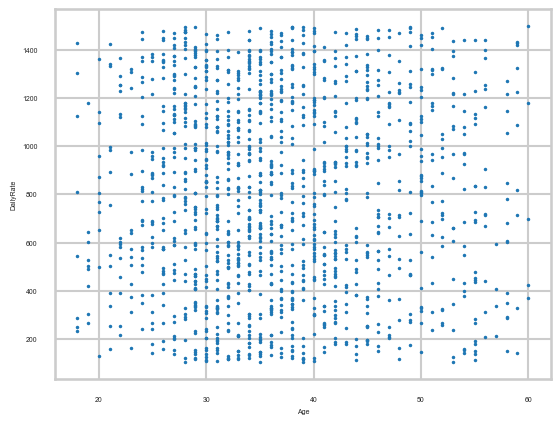

In [54]:
# Correlation이 적은 Age와 Daily Rate의 Scatter, plot, 
plt.scatter(df1['Age'], df1['DailyRate'], s=1)
plt.xlabel('Age')
plt.ylabel('DailyRate')

plt.show()


Correlation이 적은 Age와 Daily Rate의 Scatterplot 쉽게 확인 할 수 있듯이, Correltaiton이 거의 없는 것을 확인 할 수 있음.  

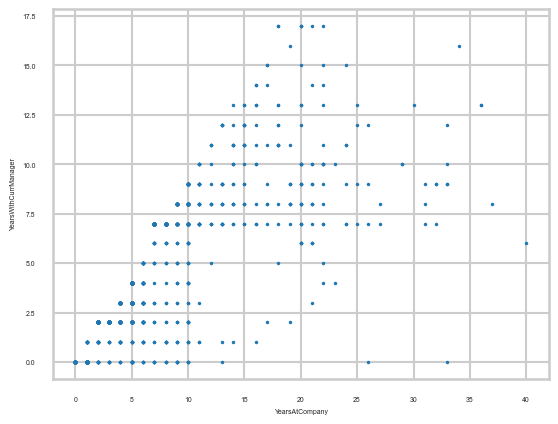

In [57]:
plt.scatter(df1['YearsAtCompany'], df1['YearsWithCurrManager'], s=1)
plt.xlabel('YearsAtCompany')
plt.ylabel('YearsWithCurrManager')

plt.show()

Correlation이 높은, YearsAtcompyny, YearsWithCurrManager끼리는  Scatterplot이 어느정도 선형관계에 있음을 확인할 수 있음.  

### 2-4 수치형-범주형 Box-Plot 찍어보기 

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

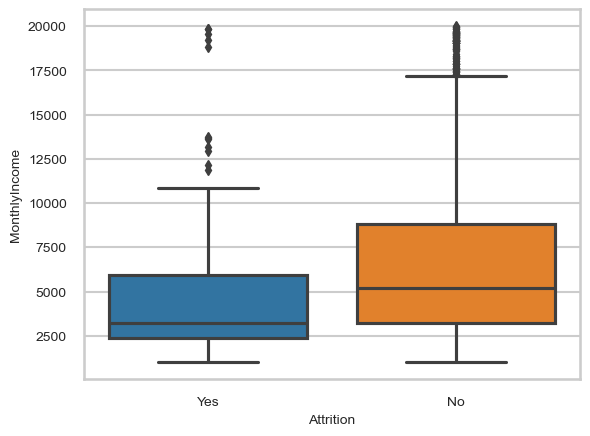

In [61]:
#Side to Side boxplot
plt.rcParams['axes.labelsize']=10
plt.rcParams['axes.titlesize']=10
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')

Attrition(퇴직 유무) 에 따른 월수입에 대한 Side to Side Boxplot, 퇴직을 한 사람이 Montly Income이 더 높은 것을 확인 할 수 있음. 

### 2-5 연령에 따른 퇴직유무 히스토그램 찍어보기


<AxesSubplot:xlabel='Age', ylabel='Count'>

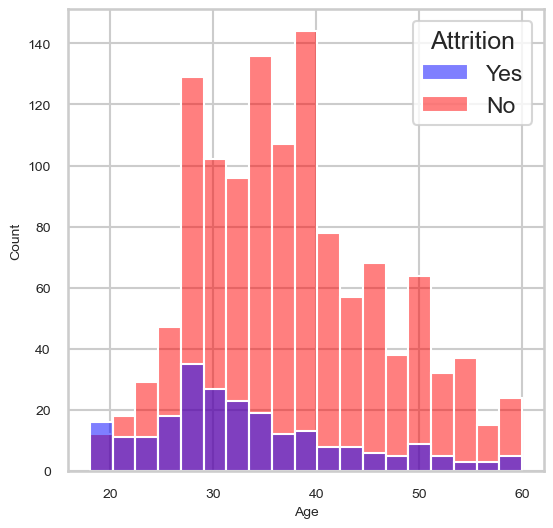

In [68]:
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="Age",hue="Attrition",data=df,palette=["b","r"])

20 대후반에서는 퇴직비율이 생각보다 높고, 그이후로 갈수록 점점 줄어드는 추세를 확인 할 수 있음. 

### 3. 수치형 변수들 간의 Correlation value 찍어보기 (heatmap은 위에 시각화에서 찍었습니다.!)

In [80]:
print(df1['StandardHours'].unique()) # 80만 있음
print(df1['EmployeeCount'].unique()) # 1만 있음

array([1], dtype=int64)

StandardHours , EmployeeCount는 한개의 값만 있으므로 제거해주고  corr 찍기 

In [81]:
# StandardHours와 EmployeeCount는 모두 1이므로 제거
df1.drop(['StandardHours','EmployeeCount'], axis=1, inplace=True)

In [82]:
# get correlation value of numeriacl variables
corr = df1.corr()
print(corr)

                               Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473 

### 4. 파생변수 만들기 

In [83]:
#  상관관계가 높은 변수들을 이용하여 파생변수 만들기    
#  YearsAtCompany, YearsWithCurrManager, YearsInCurrentRole, YearsSinceLastPromotion



# YearsAtCompany, YearsWithCurrManager, YearsInCurrentRole, YearsSinceLastPromotion
# a위 4개는 공통적인 특징이 있다고 생각하여 평균을 내어 파생변수를 만들었습니다.
df1['YearsMean'] = df1[['YearsAtCompany', 'YearsWithCurrManager', 'YearsInCurrentRole', 'YearsSinceLastPromotion']].mean(axis=1)

In [85]:
df1['YearsMean']

0       3.75
1       6.25
2       0.00
3       4.50
4       2.00
        ... 
1465    2.50
1466    5.50
1467    2.75
1468    5.75
1469    2.50
Name: YearsMean, Length: 1470, dtype: float64